	checkpoint directory created: ./model
	saving model version 0.0
experiment: PyKAN | dataset=SAD | KAN shape=[[53, 0], [1, 0], [2, 0]]


| train_loss: 7.29e-01 | test_loss: 7.43e-01 | reg: 2.56e+01 | : 100%|█| 10/10 [00:39<00:00,  3.92s/


	saving model version 0.1
MultKAN model saved to 'PyKAN___dataset_SAD___KAN_shape___53__0____1__0____2__0___multkan.pkl' using dill
	saving model version 0.2


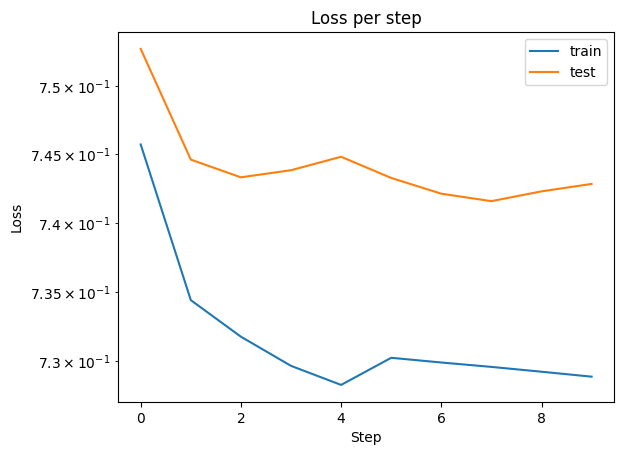

<Figure size 640x480 with 0 Axes>

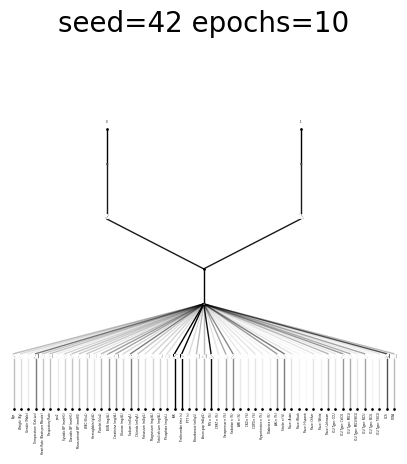

{'accuracy': 72.61089610002978, 'f1': 70.83441868542155, 'precision': 71.52411561095415, 'recall': 70.49600958526871, 'fpr': 18.948412698412696, 'fnr': 40.059568131049886}


In [3]:
import torch
import pickle
from pykan.kan import KAN
from src.preprocessing import load_and_preprocess_mimic
from src.train_kan import train_kan_model

# Load and preprocess data
data_dict = load_and_preprocess_mimic(path="data/MIMIC-IV.dta")

# Save preprocessing objects
with open("models/scaler_cont.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_cont"], f)

with open("models/scaler_ord.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_ord"], f)

with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(data_dict["label_encoders"], f)

# Save feature info
feature_config = {
    "continuous_labels": data_dict["continuous_labels"],
    "binary_labels": data_dict["binary_labels"],
    "ordinal_labels": data_dict["ordinal_labels"]
}

with open("models/feature_config.pkl", "wb") as f:
    pickle.dump(feature_config, f)

# Train the KAN model
results = train_kan_model(
    dataset=dict(list(data_dict.items())[:4]),
    original_data=data_dict['original_data'],
    num_epochs=10,
    with_graphs=True
)

model = results["model"]

torch.save(model.state_dict(), "kan_model.pt")

# Print metrics
print(results["metrics"])

In [3]:
checkpoint = torch.load('kan_model.pt')

In [12]:
import pickle

In [13]:
with open('kan_model', 'wb') as file:
    pickle.dump(model,file)